In [1]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR

In [2]:
# Import CSV as Pandas Dataframe
df = pd.read_csv("/kaggle/input/electricity-dayahead-prices-entsoe/electricity_dah_prices.csv")

In [3]:
# Display Head of Dataframe
df.head()

,date,hour,france,italy,belgium,spain,uk,germany
0,2022/01/01,00:00 - 01:00,89.06,170.28,82.02,145.86,0.27,50.05
1,2022/01/01,01:00 - 02:00,78.48,155.72,67.07,114.90,-0.01,41.33
2,2022/01/01,02:00 - 03:00,85.16,147.09,75.11,113.87,0.27,43.22
3,2022/01/01,03:00 - 04:00,50.00,91.00,50.91,97.80,-0.01,45.46
4,2022/01/01,04:00 - 05:00,37.67,104.00,37.67,97.80,-0.01,37.67


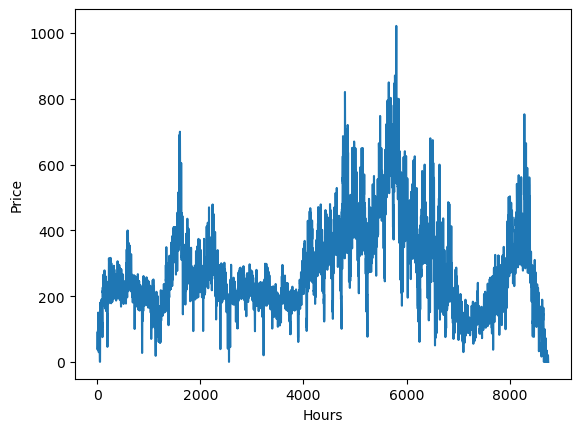

In [4]:
# Plot France Price vs Time (hours)
fig, ax = plt.subplots()


y = df["france"]
y = y[(y > 0) & (y < 1500)]

t = np.arange(0, len(y),1)

ax.set_xlabel("Hours")
ax.set_ylabel("Price")
plt.plot(t,y)

In [5]:
A = np.vstack([
np.ones(t.shape),
t,
t**2,
np.sin(t*(2*np.pi/1400)),
np.cos(t*(2*np.pi/1400)),
1/(1+t**2)
])
# transpose
A = A.T
# least squares regression for best fit
solver_output = np.linalg.lstsq(A, y, rcond=None)
a = solver_output[0]

Text(0, 0.5, 'Price')

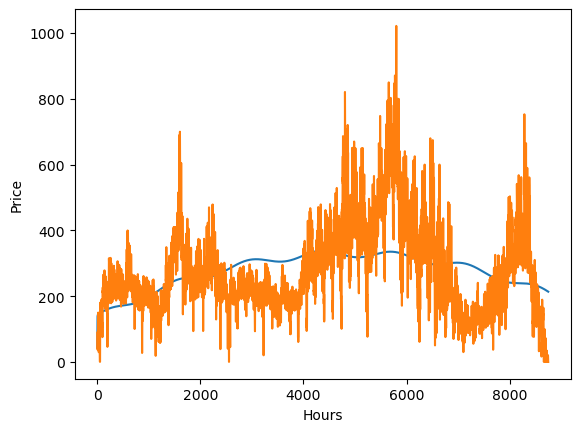

In [6]:
# plot the best fit model prediction
plt.plot(t, np.dot(A, a))
plt.plot(t,y)
plt.xlabel("Hours")
plt.ylabel("Price")

In [7]:
# Fit Data to Radial Basis Function Kernel
svr_rbf = SVR(kernel="rbf", C=100,gamma=0.1, epsilon=0.1)
y_pred = svr_rbf.fit(t.reshape(-1,1),y).predict(t.reshape(-1,1))

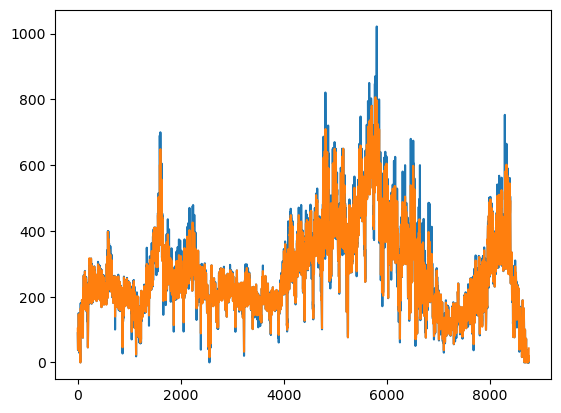

In [8]:
svr_rbf = SVR(kernel="rbf", C=100,gamma=0.1, epsilon=0.1)
y_pred = svr_rbf.fit(t.reshape(-1,1),y).predict(t.reshape(-1,1))
plt.plot(t,y)
plt.plot(t,y_pred)